# Assignment - K-Means

1. Your task is to apply k-means on iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than three clusters that is still better at tracking the real trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2).fit_transform(X_std)

In [3]:
def plot_kmeans(cluster):
    kmeans = KMeans(n_clusters=cluster, random_state=123)
    kmeans.fit(X_std)
    y_kmeans = kmeans.predict(X_std)
    
    plt.scatter(pca[:, 0], pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [4]:
columns = ["Cluster Number", "RI Score", "ARI Score"]
results = pd.DataFrame()
for i in range(2,6):
    full_pred = KMeans(n_clusters=i, random_state=123).fit_predict(X_std)
    full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])
    
    ri_score = metrics.rand_score(y, full_pred)
    ari_score = metrics.adjusted_rand_score(y, full_pred)
    
    result_df = pd.DataFrame(data=[[i, ri_score, ari_score]], columns=columns)
    results = results.append(result_df, ignore_index=True)

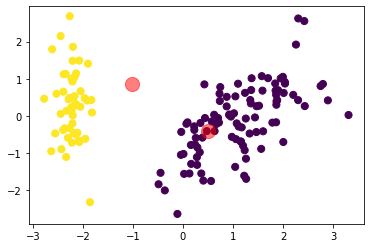

In [5]:
plot_kmeans(2)

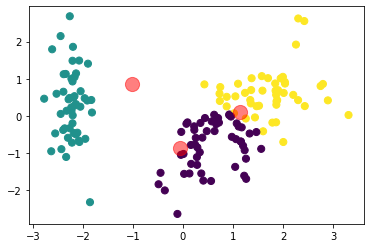

In [6]:
plot_kmeans(3)

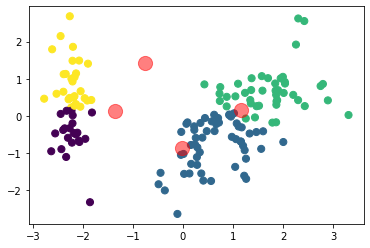

In [7]:
plot_kmeans(4)

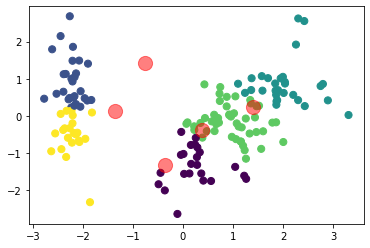

In [8]:
plot_kmeans(5)

In [9]:
results

,Cluster Number,RI Score,ARI Score
0,2,0.776286,0.568116
1,3,0.832215,0.620135
2,4,0.654228,0.250590
3,5,0.601879,0.198579


As a result we can say that for our kmeans model k value of 3 is the best one and with the increase of k our model's performance decreases.

2. In this assignment, you work with the heart disease data from the UC Irvine Machine Learning Repository. This dataset contains the records of the patients such that some of them have heart disease and some of them have not. Your task is to create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information whether the patients have heart disease or not.

In [10]:
heart_disease = pd.read_csv('risk_of_heart_attack2.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [11]:
len(heart_disease[heart_disease['num']==1])

13

In [12]:
X = heart_disease.drop('num', axis=1)
y = heart_disease['num']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2).fit_transform(X_std)

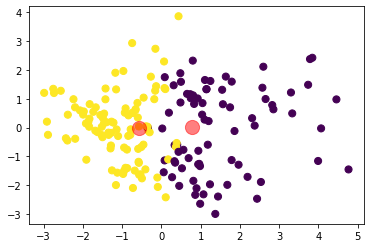

In [13]:
plot_kmeans(2)

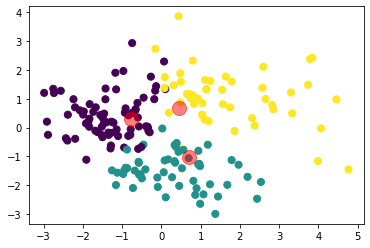

In [14]:
plot_kmeans(3)

In [15]:
full_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0,0,1
num,,
0,100,64
1,1,12


Our k-means solution assigns 64 of the observations that belong to class 0 to cluster 1 and 1 of the observations that belong to class 1 to the cluster 0. So out of 177 observations, 65 of the data points seem to be assigned to the wrong clusters. This is not a good result at all.

In [16]:
print("RI Score: {:.2f}".format(metrics.rand_score(y, full_pred)))
print("ARI Score: {:.2f}".format(metrics.adjusted_rand_score(y, full_pred)))

RI Score: 0.53
ARI Score: 0.06


Rand index and adjusted-rand index scores tell us that our k-means clustering model is not good for this dataset.